In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import joblib

# Load Instagram dataset
instagram_data = pd.read_csv('/content/instagram .csv')

# Load TikTok dataset
tiktok_data = pd.read_csv('/content/tiktok .csv')

# Load YouTube dataset
youtube_data = pd.read_csv('/content/youtube .csv')

PREPROCESSING

In [5]:
import re

# Define replacements as a dictionary
replacements = {'m': '000000', 'k': '000', '.': ''}

# Create a function for regex replacements
def multiple_replace(value):
    if isinstance(value, str):
        for old, new in replacements.items():
            value = re.sub(re.escape(old), new, value)
    return value

In [6]:
instagram_data = instagram_data.rename(columns={
    'instagram name': 'name', 'category_1': 'category', 'followers': 'followers',
    'authentic engagement': 'authentic_engagement', 'engagement avg': 'engagement_avg'
})
print(instagram_data.columns)

instagram_data['platform'] = 'Instagram'

# Remove characters from the numbers
instagram_data['followers'] = instagram_data['followers'].apply(multiple_replace)
instagram_data['authentic_engagement'] = instagram_data['authentic_engagement'].apply(multiple_replace)
instagram_data['engagement_avg'] = instagram_data['engagement_avg'].apply(multiple_replace)

# Normalize numeric columns
instagram_data['followers'] = pd.to_numeric(instagram_data['followers'], errors='coerce')
instagram_data['authentic_engagement'] = pd.to_numeric(instagram_data['authentic_engagement'], errors='coerce')
instagram_data['engagement_avg'] = pd.to_numeric(instagram_data['engagement_avg'], errors='coerce')
instagram_data.fillna(0, inplace=True)

Index(['name', 'instagram name.1', 'category', 'category_2', 'followers',
       'audience country(mostly)', 'authentic_engagement', 'engagement_avg',
       'platform'],
      dtype='object')


In [8]:
tiktok_data = tiktok_data.rename(columns={
    'tiktoker name': 'name', 'views(avg.)': 'views_avg', 'likes(avg.)': 'likes_avg',
    'comments(avg.)': 'comments_avg', 'shares(avg.)': 'shares_avg'
})
print(tiktok_data.columns)

tiktok_data['platform'] = 'TikTok'

# Remove characters from the numbers
tiktok_data['followers'] = tiktok_data['followers'].apply(multiple_replace)
tiktok_data['views_avg'] = tiktok_data['views_avg'].apply(multiple_replace)
tiktok_data['likes_avg'] = tiktok_data['likes_avg'].apply(multiple_replace)
tiktok_data['comments_avg'] = tiktok_data['comments_avg'].apply(multiple_replace)
tiktok_data['shares_avg'] = tiktok_data['shares_avg'].apply(multiple_replace)

# Normalize numeric columns
tiktok_data['followers'] = pd.to_numeric(tiktok_data['followers'], errors='coerce')
tiktok_data['views_avg'] = pd.to_numeric(tiktok_data['views_avg'], errors='coerce')
tiktok_data['likes_avg'] = pd.to_numeric(tiktok_data['likes_avg'], errors='coerce')
tiktok_data['comments_avg'] = pd.to_numeric(tiktok_data['comments_avg'], errors='coerce')
tiktok_data['shares_avg'] = pd.to_numeric(tiktok_data['shares_avg'], errors='coerce')
tiktok_data.fillna(0, inplace=True)

Index(['name', 'tiktok name', 'followers', 'views_avg', 'likes_avg',
       'comments_avg', 'shares_avg', 'platform'],
      dtype='object')


In [9]:
youtube_data = youtube_data.rename(columns={
    'youtuber name': 'name', 'views(avg.)': 'views_avg', 'likes(avg.)': 'likes_avg',
    'comments(avg.)': 'comments_avg'
})
print(youtube_data.columns)
youtube_data['platform'] = 'YouTube'

# Remove characters from the numbers
youtube_data['followers'] = youtube_data['followers'].apply(multiple_replace)
youtube_data['views_avg'] = youtube_data['views_avg'].apply(multiple_replace)
youtube_data['likes_avg'] = youtube_data['likes_avg'].apply(multiple_replace)
youtube_data['comments_avg'] = youtube_data['comments_avg'].apply(multiple_replace)

# Normalize numeric columns
youtube_data['followers'] = pd.to_numeric(youtube_data['followers'], errors='coerce')
youtube_data['views_avg'] = pd.to_numeric(youtube_data['views_avg'], errors='coerce')
youtube_data['likes_avg'] = pd.to_numeric(youtube_data['likes_avg'], errors='coerce')
youtube_data['comments_avg'] = pd.to_numeric(youtube_data['comments_avg'], errors='coerce')
youtube_data.fillna(0, inplace=True)

Index(['name', 'channel name', 'category', 'followers', 'audience country',
       'views_avg', 'likes_avg', 'comments_avg'],
      dtype='object')


CONCATENATION

In [15]:
# Select common columns and combine datasets
# instagram_data['engagement_avg'] = instagram_data['authentic_engagement'] / instagram_data['followers']
tiktok_data['engagement_avg'] = (
    tiktok_data['likes_avg'] + tiktok_data['comments_avg'] + tiktok_data['shares_avg']
) / tiktok_data['views_avg']
youtube_data['engagement_avg'] = (
    youtube_data['likes_avg'] + youtube_data['comments_avg']
) / youtube_data['views_avg']

common_columns = ['name', 'followers', 'engagement_avg', 'platform']
combined_data = pd.concat([
    instagram_data[common_columns],
    tiktok_data[common_columns],
    youtube_data[common_columns]
])

# Fill NaN values and reset index
combined_data.fillna(0, inplace=True)
combined_data.reset_index(drop=True, inplace=True)

print(combined_data.columns)

print(combined_data.head())

# Save the combined data to a CSV file
combined_data.to_csv('combined_data.csv', index=False)
head_data = combined_data.head()
print(head_data)

Index(['name', 'followers', 'engagement_avg', 'platform'], dtype='object')
            name  followers  engagement_avg   platform
0            433  485000000        0.007899  Instagram
1   __youngbae__  127000000        0.003764  Instagram
2    _agentgirl_  188000000        0.016532  Instagram
3    _imyour_joy  135000000        0.081481  Instagram
4  _jeongjaehyun  111000000        0.225225  Instagram
            name  followers  engagement_avg   platform
0            433  485000000        0.007899  Instagram
1   __youngbae__  127000000        0.003764  Instagram
2    _agentgirl_  188000000        0.016532  Instagram
3    _imyour_joy  135000000        0.081481  Instagram
4  _jeongjaehyun  111000000        0.225225  Instagram


INFLUENCER DEFINATION

In [32]:
# Define "is_influencer" based on thresholds
def label_influencer(row):
    if row['followers'] >= 150000 and row['engagement_avg'] >= 0.005:
        return 1  # Influencer
    else:
        return 0  # Non-influencer

combined_data['is_influencer'] = combined_data.apply(label_influencer, axis=1)

print(combined_data)

               name  followers  engagement_avg   platform  is_influencer  \
0               433  485000000        0.007899  Instagram              1   
1      __youngbae__  127000000        0.003764  Instagram              0   
2       _agentgirl_  188000000        0.016532  Instagram              1   
3       _imyour_joy  135000000        0.081481  Instagram              1   
4     _jeongjaehyun  111000000        0.225225  Instagram              1   
...             ...        ...             ...        ...            ...   
2995    futparódias   92000000        0.080429    YouTube              1   
2996        el gato   92000000        0.126184    YouTube              1   
2997     cinemasins   92000000        0.347547    YouTube              1   
2998     cricketicc   92000000        0.006000    YouTube              1   
2999        brksedu   92000000        0.087485    YouTube              1   

      platform_encoded  
0                    0  
1                    0  
2           

In [36]:
# Encode platform as a numeric variable
label_encoder = LabelEncoder()
combined_data['platform_encoded'] = label_encoder.fit_transform(combined_data['platform'])
joblib.dump(label_encoder, "platform_label_encoder.pkl")

['platform_label_encoder.pkl']

In [34]:
# Define features and target
features = ['followers', 'engagement_avg', 'platform_encoded']
X = combined_data[features]
y = combined_data['is_influencer']

TRAINING AND TESTING

In [37]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Clean data
X_train[np.isinf(X_train)] = np.nan
X_test[np.isinf(X_test)] = np.nan

X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0

X_train = np.clip(X_train, -1e10, 1e10)
X_test = np.clip(X_test, -1e10, 1e10)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       745

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



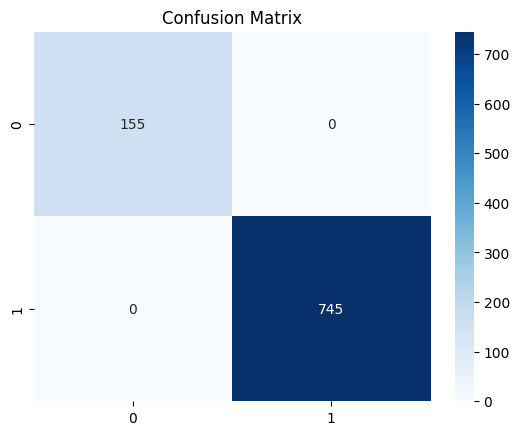

In [40]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

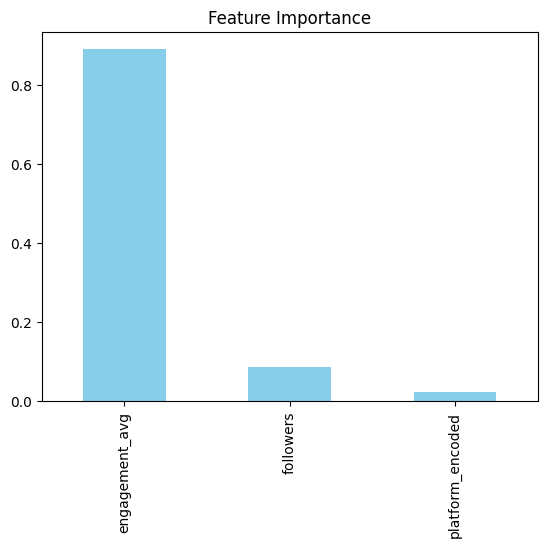

In [41]:
# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
feature_importances.plot(kind='bar', title='Feature Importance', color='skyblue')
plt.show()

In [42]:
# Save the trained model
joblib.dump(model, "influencer_prediction_model.pkl")

['influencer_prediction_model.pkl']

LOAD MODEL FOR TESTING

In [50]:
# Load the saved model and label encoder
loaded_model = joblib.load("influencer_prediction_model.pkl")
label_encoder = joblib.load("platform_label_encoder.pkl")

# Predict for new data
new_data = pd.DataFrame({
    'followers': [125],
    'engagement_rate': [0.001],
    'platform_encoded': [1]  # Example: TikTok
})
prediction = loaded_model.predict(new_data)

print("Influencer Prediction:", "Yes" if prediction[0] == 1  else "No")

Influencer Prediction: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


INFLUENCER PREDICTION WITH USER INPUT

In [52]:
import joblib
import pandas as pd

# Load the saved model and label encoder
loaded_model = joblib.load("influencer_prediction_model.pkl")
label_encoder = joblib.load("platform_label_encoder.pkl")

# Function to take user input and predict influencer status
def predict_influencer():
    print("Enter the details of the social media profile:")

    # Get user input
    followers = float(input("Enter number of followers: "))
    engagement_rate = float(input("Enter engagement rate (e.g., 0.005 for 5%): "))
    platform = input("Enter platform (Instagram, TikTok, YouTube): ").strip()

    # Encode the platform using the label encoder
    try:
        platform_encoded = label_encoder.transform([platform])[0]
    except ValueError:
        print("Invalid platform entered. Please choose from 'Instagram', 'TikTok', or 'YouTube'.")
        return

    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'followers': followers,
        'engagement_rate': engagement_rate,
        'platform_encoded': [platform_encoded]
    })

    # Make the prediction
    prediction = loaded_model.predict(input_data)

    # Display the result
    if prediction[0] == 1:
        print("This user is likely an influencer!")
    else:
        print("This user is not an influencer.")

# Call the function to allow user input and prediction
predict_influencer()

Enter the details of the social media profile:
Enter number of followers: 15792584
Enter engagement rate (e.g., 0.05 for 5%): 0.5
Enter platform (Instagram, TikTok, YouTube): Instagram
This user is likely an influencer!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
